In [1]:
import ipyparallel as ipp

rc = ipp.Client()
dview = rc[:]

rc.ids


/home/hegder/anaconda3/envs/dp2/lib/python3.5/site-packages/ipyparallel/client/client.py:459: RuntimeWarning: 
            Controller appears to be listening on localhost, but not on this machine.
            If this is true, you should specify Client(...,sshserver='you@Gamma')
            or instruct your controller to listen on an external IP.
  RuntimeWarning)


[0, 1, 2, 3, 4, 5, 6, 7]

In [2]:
%%px --local

import numpy as np
import warnings
import hyptune as htun
import scnets as scn
import h5py
import os
from sklearn.model_selection import train_test_split

warnings.filterwarnings('ignore')
#now load this dataset 
h5f = h5py.File('./datasets/s8_sio2tio2_v2.h5','r')
X = h5f['sizes'][:]
Y = h5f['spectrum'][:]

#get the ranges of the loaded data
num_layers = X.shape[1]
num_lpoints = Y.shape[1]
size_max = np.amax(X)
size_min = np.amin(X)
size_av = 0.5*(size_max + size_min)

#this information is not given in the dataset
lam_min = 300
lam_max = 1200
lams = np.linspace(lam_min, lam_max, num_lpoints)

#create a train - test split of the dataset
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.55, random_state=42)

# normalize inputs 
x_train = (x_train - 50)/20 
x_test = (x_test - 50)/20 

print("Dataset has been loaded")
# print("x-train", x_train.shape)
# print("x-test ", x_test.shape)
# print("y-train", y_train.shape)
# print("y-test ", y_test.shape)



Using MXNet backend


Dataset has been loaded
[stdout:0] Dataset has been loaded
[stdout:1] Dataset has been loaded
[stdout:2] Dataset has been loaded
[stdout:3] Dataset has been loaded
[stdout:4] Dataset has been loaded
[stdout:5] Dataset has been loaded
[stdout:6] Dataset has been loaded
[stdout:7] Dataset has been loaded


[stderr:0] Using MXNet backend
[stderr:1] Using MXNet backend
[stderr:2] Using MXNet backend
[stderr:3] Using MXNet backend
[stderr:4] Using MXNet backend
[stderr:5] Using MXNet backend
[stderr:6] Using MXNet backend
[stderr:7] Using MXNet backend


In [ ]:
%%px --local
import numpy as np
import warnings
import hyptune as htun
import scnets as scn
import h5py
import os
from sklearn.model_selection import train_test_split
print(42)

In [3]:
def ff(x):
    func = scn.resnet


    param_grid = dict(num_units=[x], 
                  red_dim=[8,16],
                  gpu_id=[x%2],
                  batch_size=[32, 64],
                  ker_size=[3, 5, 7])
    cvresults = htun.get_cv_grid(modelfunc=func, 
                             param_grid=param_grid,
                             num_epochs=250,
                             x_train=x_train,
                             y_train=y_train)
    htres = htun.print_tuning_results(cvresults, func)
    outname = "n" + str(x) + "_cvsrch.dat"
    htres.to_csv(outname)
    


asyn = dview.map_async(ff,[2,3, 4, 5, 6])

In [4]:
for out in asyn.stdout:
    print(out)

Fitting 3 folds for each of 12 candidates, totalling 36 fits

Fitting 3 folds for each of 12 candidates, totalling 36 fits

Fitting 3 folds for each of 12 candidates, totalling 36 fits

Fitting 3 folds for each of 12 candidates, totalling 36 fits

Fitting 3 folds for each of 12 candidates, totalling 36 fits



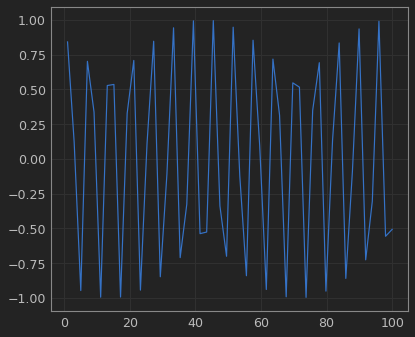

In [6]:
import matplotlib.pyplot as plt
#from scattnlay import scattnlay, fieldnlay

#import jtplot submodule from jupyterthemes
from jupyterthemes import jtplot
# currently installed theme will be used to
# set plot style if no arguments provided
jtplot.style()



a = np.linspace(1,100)
b = np.sin(a)
plt.plot(a,b)

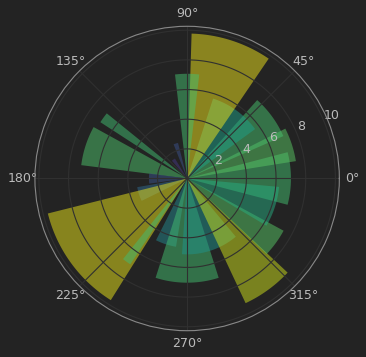

In [8]:
# Fixing random state for reproducibility
np.random.seed(19680801)

# Compute pie slices
N = 20
theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)
radii = 10 * np.random.rand(N)
width = np.pi / 4 * np.random.rand(N)

ax = plt.subplot(111, projection='polar')
bars = ax.bar(theta, radii, width=width, bottom=0.0)

# Use custom colors and opacity
for r, bar in zip(radii, bars):
    bar.set_facecolor(plt.cm.viridis(r / 10.))
    bar.set_alpha(0.5)

plt.show()